<img src='images/besm.png' width='150px'>

<center> درس پردازش زبان‌های طبیعی </center>
<center> آزمایشگاه پردازش هوشمند متن و زبان و علوم انسانی محاسباتی </center>
<br>
<center> http://language.ml </center>
<center> contact: asgari [AT] berkeley [dot] edu </center>

</h1> <h1 style='direction:rtl'>مدل زبانی 
    
  

<h2 style='direction:rtl;'> اشعار حافظ و سعدی  </h2> 



In [4]:
import random 
import numpy as np
import nltk
import pandas as pd
import codecs
import tqdm
    
# Hafez and Saadi collection -- Hafez [0:8384] Saadi[9384::]
HAFEZ_end=8384
SAADI_start=9384
mesra_collection = [x.strip().split() for x in tqdm.tqdm(codecs.open('farsi/mesra.txt','rU','utf-8').readlines())]

100%|██████████| 329707/329707 [00:00<00:00, 539407.70it/s]


<h4 style='direction:rtl;'> مثال بررسی اولیه داده غزلیات فارسی. برای مطالعه بیشتر به مقاله زیر مراجعه کنید  </h4> 

<br/>

Asgari, Ehsaneddin, and Jean-Cédric Chappelier. <b>Linguistic resources and topic models for the analysis of persian poems.</b> <i>Proceedings of NAACL-HLT Workshop on Computational Linguistics for Literature. 2013 </i>.

https://aclanthology.org/W13-1404.pdf 

<h2 style='direction:rtl;'> § نرمالایز کردن  </h2> 



In [5]:
from __future__ import unicode_literals
from hazm import *

normalizer = Normalizer()

mesra_normalized = [[normalizer.normalize(y) for y in x] for x in tqdm.tqdm(mesra_collection)]

100%|██████████| 329707/329707 [00:39<00:00, 8398.79it/s]


In [3]:
for x in random.sample(mesra_normalized, 30):
    print(' '.join(x))

چو خاتونان مصر از عشق یوسف
زیر هر توی آن سخن توییست
حلقه دیوانگی زد، عقل و راه در گرفت
ندامت برد از آیینه‌ام زنگ هوس بید‌ل
پیوسته بوی باغ و گلستانم آرزوست
پیدا کند ز پوست مگر پرده‌دار مغز
زیرا که غمش کمی ندارد
گه در نظارهٔ خویش، گه در خیال مردم
زر بازدهی و بنهی سر به حجر بر
خدای گفت قم اللیل و از گزاف نگفت
کشتی مساز نوح که طوفان آتش است
هر که او دیدهٔ مردم کش مستت دیدست
چون به یک دم صد جهان واپس کنم
هر بی خبر چگونه خبر زان دهان دهد
این کتاب نیک می دانیم ما
سخن عشق، که عقلم به معما می‌خواند
که چون خورشیدم از روزن نظر کرد
هم از دل خود گردد در هر نفسی خوشتر
در هم نگرستیم و گرستیم و گذشتیم
چون کنم چون مرغ دل در دام آن زنجیر موست
شتاب کن که جهان با شتاب می گذرد
زود باشد کز خجالت رو به دیوار آورد
موج هرجا، در جمعیت‌گوهر زده است
که از جفای تو دستی بر آسمان دارم
چون نیست یقین که محض جانی
بازآمدی کف می‌زنی تا خانه‌ها ویران کنی
آخر این جیب هوس پردهٔ ناموس نبود
نیست بی‌خشکی لب گر همه دریا باشد
کرده از گوشه کنارم هدف ناوک ناز
نوای زیر و بم از جان مرغ زار برآید


<h2 style='direction:rtl;'> § جمله‌بندی  </h2> 



In [7]:
mesra_sentences = [sent_tokenize(' '.join(x)) for x in tqdm.tqdm(mesra_normalized)]

100%|██████████| 329707/329707 [00:01<00:00, 258668.82it/s]


<h2 style='direction:rtl;'> § توکنایزیشن  </h2> 



In [8]:
mesra_tokens = [[word_tokenize(sent) for sent in sents][0] for sents in tqdm.tqdm(mesra_sentences)]

100%|██████████| 329707/329707 [00:02<00:00, 119213.94it/s]


In [273]:
random.sample(mesra_tokens, 30)

[['که', 'در', 'ظلمت', 'ز', 'آمدشد', 'پری', 'را', 'پای', 'می', 'سایم'],
 ['گر',
  'همه',
  'اشکی',
  'به',
  'دست',
  'آید',
  'تو',
  'را',
  '،',
  'آن',
  'هم',
  'فرست'],
 ['عدل', 'مثال', 'مشعله', 'ظلم', 'چو', 'کور', 'یا', 'کری'],
 ['بنشین', 'یکدم', 'و', 'برآتش', 'تیزم', 'منشان'],
 ['در', 'کتاب', 'آفرینش', 'جمله', 'خط', 'توأمیم'],
 ['تختگاه', 'عشق', 'ما', 'داریم', 'و', 'از', 'دار', 'ایمنیم'],
 ['خار', 'سودای', 'تو', 'در', 'دل', 'به', 'هوای', 'گل', 'وصل'],
 ['به', 'خویش', 'چشم\u200cگشودن', 'وداع', 'فرصت', 'بود'],
 ['با', 'برهمن', 'مگو', 'سخن', 'شرع', 'بعد', 'ازین'],
 ['بجز', 'این', 'معنی', 'باریک', 'نیامد', 'بیرون'],
 ['زنده', 'باشیم', 'و', 'همه', 'روضه', 'بخوانیم', 'که', 'چه'],
 ['درگیر', 'شمع', 'را', 'وز', 'سر', 'تا', 'به', 'پا', 'بپرس'],
 ['چشم', 'تابرهم', 'زنم', 'اشکی', 'به\u200cخون', 'غلتیده', 'است'],
 ['که', 'تا', 'دست', 'خدا', 'بر', 'رویت', 'ازاغبار', 'در', 'بندد'],
 ['کسی', 'که', 'گشته', 'به', 'تقلید', 'آدمی', 'سیر', 'ت'],
 ['وگر', 'پنهان', 'نه\u200cای', '،', 'پیدا', 'کجایی',

<h2 style='direction:rtl;'> § مدل زبانی</h2> 

In [9]:
import itertools
import nltk
import random
from collections import Counter, defaultdict
from pprint import pprint

def create_language_model(unigrams, bigrams, unigrams_counts, bigrams_counts):
    '''The language_model is a nested dictionary where each key is a word w from the
    poetry collection, and each value is another dictionary with all of the words
    that could possible follow w (and their associated probabilities based on MLE).
    '''
    language_model = defaultdict(dict)  #initialize a dictionary where each key has another dictionary as its value

    for bigram in bigrams:
        w_i_minus1 = bigram[0]   #first word
        w_i = bigram[1]          #second word
        language_model[w_i_minus1][w_i] = bigrams_counts[bigram]/unigrams_counts[w_i_minus1]   #this is MLE calculation
    
    return language_model

In [10]:
# find unigram counts (to be used as denominators)
unigrams =list(itertools.chain(*list(itertools.chain(*mesra_tokens))))
unigrams_counts = Counter(unigrams)

# find bigram counts (to be used as numerators)
bigrams = list(nltk.bigrams(unigrams))
bigrams_counts = Counter(bigrams)

In [11]:
stopwords = ['ز','ار']+[normalizer.normalize(x.strip()) for x in codecs.open('farsi/stopwords.txt','r','utf-8').readlines()]

# Unigram language model of Hafez/Saadi

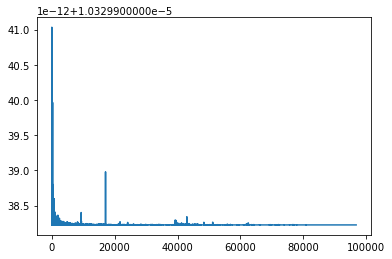

In [78]:
from scipy.special import softmax
import matplotlib.pyplot as plt

next_wp = [(x,y) for x,y in list(unigrams_counts.items())]
next_p = [float(y)/100 for x,y in next_wp]
next_p = next_p/np.sum(next_p)
next_p =softmax(next_p*0.00001)
plt.plot(list(range(len(next_p))),next_p)

In [79]:
do_repeat = True

generated = []

while(len(generated)<10):
    token = next_wp[np.random.choice(len(next_wp), 1, replace=False, p=next_p)[0]][0]
    if (token not in generated or do_not_repeat):
        generated.append(token)

print(' '.join(generated))

نیازم‌ این‌است کمینگاه ندانم‌کجاکنم می‌رو مریخش ;عالم پیامش جهات میانه‌ای


# Bigram language model of Hafez/Saadi

In [80]:
language_model = create_language_model(unigrams, bigrams, unigrams_counts, bigrams_counts)

In [81]:
word = 'چشمه'
nextw_p = list(language_model[word].items())
nextw_p[np.random.choice(len(nextw_p), 1, replace=False, p=[y for x,y in nextw_p])[0]]

('حیوانی', 0.011396011396011397)

In [83]:
def generate(language_model, start, length=10):

    generated = [start]
    pair_w_p = list(language_model[start].items())
    
    for i in range(length):
        idx = np.random.choice(len(pair_w_p), 1, replace=False, p=[y for x,y in pair_w_p])[0]
        next_w = pair_w_p[idx][0]
        generated.append(next_w)
        pair_w_p = list(language_model[next_w].items())
    return print(' '.join(generated))

In [84]:
 generate(language_model, 'دوش', length=10)

دوش پرسیدم از وسواس هوای خوشی بما نمیکنی فیض ذوق دریا


<h2 style='direction:rtl;'> § استفاده از POS-tags  </h2> 

In [98]:
tagger = POSTagger(model='resources/postagger.model')

In [103]:
def generate_sent(language_model, start):

    generated = [start]
    pair_w_p = list(language_model[start].items())
    tag = tagger.tag([start])[0][1]
    while(tag[0]!='V'):
        idx = np.random.choice(len(pair_w_p), 1, replace=False, p=[y for x,y in pair_w_p])[0]
        next_w = pair_w_p[idx][0]
        generated.append(next_w)
        tag = tagger.tag(generated)[-1][1]
        pair_w_p = list(language_model[next_w].items())
    return print(' '.join(generated))

In [104]:
generate_sent(language_model, 'دوش')

دوش دولت بر سر ندارد


<h2 style='direction:rtl;'> § N-gram Language Model </h2> 

In [318]:
# Modified version of 
# https://github.com/joshualoehr/ngram-language-model/blob/master/language_model.py
from itertools import product
import math
import nltk


class LanguageModel(object):
    """An n-gram language model trained on a given corpus.
    
    For a given n and given training corpus, constructs an n-gram language
    model for the corpus by:
    1. preprocessing the corpus (adding SOS/EOS/UNK tokens)
    2. calculating (smoothed) probabilities for each n-gram
    Also contains methods for calculating the perplexity of the model
    against another corpus, and for generating sentences.
    Args:
        train_data (list of str): list of sentences comprising the training corpus.
        n (int): the order of language model to build (i.e. 1 for unigram, 2 for bigram, etc.).
        laplace (int): lambda multiplier to use for laplace smoothing (default 1 for add-1 smoothing).
    """

    SOS = "<s>"
    EOS = "</s>"
    UNK = "<UNK>"
    
    def __init__(self, train_data, n, laplace=1):
        self.n = n
        self.vocab = dict()
        self.laplace = laplace
        self.tokens = self.preprocess(train_data, n)
        self.vocab  = nltk.FreqDist(self.tokens)
        self.model  = self._create_model()
        self.masks  = list(reversed(list(product((0,1), repeat=n))))

    def _smooth(self):
        """Apply Laplace smoothing to n-gram frequency distribution.
        
        Here, n_grams refers to the n-grams of the tokens in the training corpus,
        while m_grams refers to the first (n-1) tokens of each n-gram.
        Returns:
            dict: Mapping of each n-gram (tuple of str) to its Laplace-smoothed 
            probability (float).
        """
        vocab_size = len(self.vocab)

        n_grams = nltk.ngrams(self.tokens, self.n)
        n_vocab = nltk.FreqDist(n_grams)

        m_grams = nltk.ngrams(self.tokens, self.n-1)
        m_vocab = nltk.FreqDist(m_grams)

        def smoothed_count(n_gram, n_count):
            m_gram = n_gram[:-1]
            m_count = m_vocab[m_gram]
            return (n_count + self.laplace) / (m_count + self.laplace * vocab_size)

        return { n_gram: smoothed_count(n_gram, count) for n_gram, count in n_vocab.items() }

    def _create_model(self):
        """Create a probability distribution for the vocabulary of the training corpus.
        
        If building a unigram model, the probabilities are simple relative frequencies
        of each token with the entire corpus.
        Otherwise, the probabilities are Laplace-smoothed relative frequencies.
        Returns:
            A dict mapping each n-gram (tuple of str) to its probability (float).
        """
        if self.n == 1:
            num_tokens = len(self.tokens)
            return { (unigram,): count / num_tokens for unigram, count in self.vocab.items() }
        else:
            return self._smooth()

    def _convert_oov(self, ngram):
        """Convert, if necessary, a given n-gram to one which is known by the model.
        Starting with the unmodified ngram, check each possible permutation of the n-gram
        with each index of the n-gram containing either the original token or <UNK>. Stop
        when the model contains an entry for that permutation.
        This is achieved by creating a 'bitmask' for the n-gram tuple, and swapping out
        each flagged token for <UNK>. Thus, in the worst case, this function checks 2^n
        possible n-grams before returning.
        Returns:
            The n-gram with <UNK> tokens in certain positions such that the model
            contains an entry for it.
        """
        mask = lambda ngram, bitmask: tuple((token if flag == 1 else "<UNK>" for token,flag in zip(ngram, bitmask)))

        ngram = (ngram,) if type(ngram) is str else ngram
        for possible_known in [mask(ngram, bitmask) for bitmask in self.masks]:
            if possible_known in self.model:
                return possible_known

    def perplexity(self, test_data):
        """Calculate the perplexity of the model against a given test corpus.
        
        Args:
            test_data (list of str): sentences comprising the training corpus.
        Returns:
            The perplexity of the model as a float.
        
        """
        test_tokens = self.preprocess(test_data, self.n)
        test_ngrams = nltk.ngrams(test_tokens, self.n)
        N = len(test_tokens)

        known_ngrams  = [self._convert_oov(ngram) for ngram in test_ngrams]
        probabilities = [self.model[ngram] for ngram in known_ngrams]
        
        for x,y in zip(known_ngrams, probabilities):
            print(x,y)
        
        return math.exp((-1/N) * sum(map(math.log, probabilities)))

    def _best_candidate(self, prev, without=[]):
        
        blacklist  = [LanguageModel.UNK] + without

        if len(prev) < self.n:
            prev = [LanguageModel.SOS]*(self.n-1)

        candidates = list(((ngram[-1],prob) for ngram,prob in self.model.items() if ngram[:-1]==tuple(prev)))

        probs = [y for x,y in candidates]
        probs = probs/np.sum(probs)
        words = [x for x,y in candidates]

        idx = np.random.choice(len(words), 1, replace=False, p=probs)[0]
        
        while words[idx] in blacklist:
            idx = np.random.choice(len(words), 1, replace=False, p=probs)[0]
        
        return (words[idx], probs[idx])
         
    def generate_sentence(self, min_len=12, max_len=24):
        sent, prob = ([LanguageModel.SOS] * (max(1, self.n-1)), 1)
        while sent[-1] != LanguageModel.EOS:
            prev = () if self.n == 1 else tuple(sent[-(self.n-1):])
            blacklist = sent + ([LanguageModel.EOS,LanguageModel.SOS] if len(sent) < min_len else [])
            next_token, next_prob = self._best_candidate(prev, without=blacklist)
            sent.append(next_token)
            prob *= next_prob

            if len(sent) >= max_len:
                sent.append(LanguageModel.EOS)

        return (' '.join(sent[(self.n-1):-1]), -1/math.log(prob))
    
    

    def add_sentence_tokens(self, sentences, n):
        """Wrap each sentence in SOS and EOS tokens.
        For n >= 2, n-1 SOS tokens are added, otherwise only one is added.
        Args:
            sentences (list of str): the sentences to wrap.
            n (int): order of the n-gram model which will use these sentences.
        Returns:
            List of sentences with SOS and EOS tokens wrapped around them.
        """
        sos = ' '.join([LanguageModel.SOS] * (n-1)) if n > 1 else LanguageModel.SOS
        return ['{} {} {}'.format(sos, s, LanguageModel.EOS) for s in sentences]

    def replace_singletons(self, tokens):
        """Replace tokens which appear only once in the corpus with <UNK>.

        Args:
            tokens (list of str): the tokens comprising the corpus.
        Returns:
            The same list of tokens with each singleton replaced by <UNK>.

        """
        if len(self.vocab) == 0:
            self.vocab = nltk.FreqDist(tokens)
        return [token if self.vocab[token] > 1 else LanguageModel.UNK for token in tokens]

    def preprocess(self, sentences, n):
        """Add SOS/EOS/UNK tokens to given sentences and tokenize.
        Args:
            sentences (list of str): the sentences to preprocess.
            n (int): order of the n-gram model which will use these sentences.
        Returns:
            The preprocessed sentences, tokenized by words.
        """
        sentences = self.add_sentence_tokens(sentences, n)
        tokens = ' '.join(sentences).split()
        tokens = self.replace_singletons(tokens)
        return tokens    

In [319]:
#mesra_tokens = [' '.join(x) for x in mesra_tokens]

In [320]:
language_model = LanguageModel(mesra_tokens, 3, 1)

In [298]:
candidates = list(((ngram[-1],prob) for ngram,prob in self.model.items() if ngram[:-1]==tuple(prev)))


In [322]:
sent, prob= language_model.generate_sentence(min_len=12, max_len=30)

print(sent)
print(prob)

نبرد بی دولت تا آمد جمعی زهی لبت آنکه بوئی شیشه در اگر گوئی کاش گل‌های من مه که داد ماه مسیح آن خضر از چارهٔ صد بی‌او
0.004860917286486039


In [275]:
language_model.perplexity([normalizer.normalize('الا یا ایها الساقی ادر کاسا و ناولها')])

('<s>', '<s>', 'الا') 0.0005220442607422716
('<s>', 'الا', 'یا') 0.0006175478599591468
('الا', 'یا', 'ایها') 0.00019074868860276584
('یا', 'ایها', 'الساقی') 0.00016698473282442748
('ایها', 'الساقی', 'ادر') 0.00014313318542904174
('الساقی', 'ادر', 'کاسا') 7.157513002815288e-05
('ادر', 'کاسا', 'و') 7.158025339409702e-05
('کاسا', 'و', 'ناولها') 7.158025339409702e-05
('و', 'ناولها', '</s>') 4.77190303493033e-05


1394.8209766742411

In [278]:
language_model.perplexity([normalizer.normalize('من این توپ رو نداشتم مشقام رو خوب نوشتم')])

('<s>', '<s>', 'من') 0.00893126237836907
('<s>', 'من', 'این') 0.0011055343047294758
('من', 'این', '<UNK>') 0.00011866337573571293
('این', '<UNK>', '<UNK>') 0.0004963600264725347
('<UNK>', '<UNK>', '<UNK>') 0.007975336773674686
('<UNK>', '<UNK>', '<UNK>') 0.007975336773674686
('<UNK>', '<UNK>', '<UNK>') 0.007975336773674686
('<UNK>', '<UNK>', '<UNK>') 0.007975336773674686
('<UNK>', '<UNK>', '<UNK>') 0.007975336773674686
('خوب', '<UNK>', '</s>') 9.54380606986066e-05


169.39914830074972

In [279]:
language_model.perplexity([normalizer.normalize('در آرزوی تو چشمم سپید گشت و غمی نیست اگر قبول تو افتد فدای چشم سیاهت')])

('<s>', '<s>', 'در') 0.028106970636355807
('<s>', 'در', 'آرزوی') 0.0008213473917445036
('در', 'آرزوی', 'تو') 0.00014286734766769056
('آرزوی', 'تو', '<UNK>') 4.7684898192742357e-05
('تو', '<UNK>', '<UNK>') 0.00023485755889053288
('<UNK>', '<UNK>', '<UNK>') 0.007975336773674686
('سپید', 'گشت', 'و') 4.772130756382725e-05
('گشت', 'و', '<UNK>') 4.7545465351242125e-05
('و', '<UNK>', 'نیست') 0.000386988094425095
('<UNK>', 'نیست', '<UNK>') 0.0002127609276376445
('نیست', 'اگر', '<UNK>') 7.155635062611807e-05
('اگر', '<UNK>', 'تو') 4.7514967214672624e-05
('<UNK>', 'تو', '<UNK>') 0.0002601333774771792
('تو', '<UNK>', '<UNK>') 0.00023485755889053288
('<UNK>', '<UNK>', 'چشم') 4.467975783571253e-05
('<UNK>', 'چشم', '<UNK>') 9.530617107457708e-05
('چشم', 'سیاهت', '</s>') 4.77190303493033e-05


1979.3616938933349

In [280]:
language_model.perplexity([normalizer.normalize('قرعه‌کشی پلی‌آف جام جهانی 2022 در اروپا؛ ایتالیا و پرتغال در مسیر مشترک')])

('<s>', '<s>', '<UNK>') 0.019232218203737193
('<s>', '<UNK>', '<UNK>') 0.013821221078381409
('<UNK>', '<UNK>', '<UNK>') 0.007975336773674686
('<UNK>', 'جام', '<UNK>') 9.541757114572648e-05
('<UNK>', '<UNK>', '<UNK>') 0.007975336773674686
('جهانی', '<UNK>', 'در') 4.7714476572192006e-05
('<UNK>', 'در', '<UNK>') 0.0007979722117912129
('در', '<UNK>', '<UNK>') 0.0007965140795577004
('<UNK>', '<UNK>', 'و') 0.0026361057123070394
('<UNK>', 'و', '<UNK>') 0.006368263678071718
('و', '<UNK>', 'در') 0.00043251610553392977
('<UNK>', 'در', '<UNK>') 0.0007979722117912129
('در', '<UNK>', '<UNK>') 0.0007965140795577004
('<UNK>', '<UNK>', '</s>') 0.02182606170274557


247.86073221856296

</h2> <h2 style='direction:rtl'>هموار سازی  
    
  

In [281]:
objm = 'را'
saw = 'دید'
said = 'گفت'
slept = 'خوابید'
grammar_str=F'''
S -> NP VP
NP -> Det N
PP -> P NP
VP -> '{slept}' | NP '{objm}' '{saw}'  | PP '{said}' 
Det -> 'یک'
N -> 'گرگ' | 'آهو'
P -> 'به'
'''

In [282]:
from nltk.parse.generate import generate
from nltk import CFG
grammar = CFG.fromstring(grammar_str)

In [283]:
sentences = []
for sentence in generate(grammar, n=100):
    sentences.append(sentence)

In [284]:
sentences

[['یک', 'گرگ', 'خوابید'],
 ['یک', 'گرگ', 'یک', 'گرگ', 'را', 'دید'],
 ['یک', 'گرگ', 'یک', 'آهو', 'را', 'دید'],
 ['یک', 'گرگ', 'به', 'یک', 'گرگ', 'گفت'],
 ['یک', 'گرگ', 'به', 'یک', 'آهو', 'گفت'],
 ['یک', 'آهو', 'خوابید'],
 ['یک', 'آهو', 'یک', 'گرگ', 'را', 'دید'],
 ['یک', 'آهو', 'یک', 'آهو', 'را', 'دید'],
 ['یک', 'آهو', 'به', 'یک', 'گرگ', 'گفت'],
 ['یک', 'آهو', 'به', 'یک', 'آهو', 'گفت']]

In [285]:
# find unigram counts (to be used as denominators)
unigrams_counts = Counter(itertools.chain(*sentences))

# find bigram counts (to be used as numerators)
bigrams = list(nltk.bigrams(itertools.chain(*sentences)))

bigrams_counts = Counter(bigrams)

In [286]:
unigrams_counts

Counter({'یک': 18,
         'گرگ': 9,
         'خوابید': 2,
         'را': 4,
         'دید': 4,
         'آهو': 9,
         'به': 4,
         'گفت': 4})

In [287]:
bigrams_counts

Counter({('یک', 'گرگ'): 9,
         ('گرگ', 'خوابید'): 1,
         ('خوابید', 'یک'): 2,
         ('گرگ', 'یک'): 2,
         ('گرگ', 'را'): 2,
         ('را', 'دید'): 4,
         ('دید', 'یک'): 4,
         ('یک', 'آهو'): 9,
         ('آهو', 'را'): 2,
         ('گرگ', 'به'): 2,
         ('به', 'یک'): 4,
         ('گرگ', 'گفت'): 2,
         ('گفت', 'یک'): 3,
         ('آهو', 'گفت'): 2,
         ('آهو', 'خوابید'): 1,
         ('آهو', 'یک'): 2,
         ('آهو', 'به'): 2})

In [288]:
# hints for Farsi writing
# https://stackoverflow.com/questions/60725889/mixed-multiple-persianfarsi-and-english-text-in-matplotlib
#!pip install arabic-reshaper
#!pip install python-bidi

import matplotlib as mpl
import os
import arabic_reshaper
from matplotlib import font_manager as fm, rcParams
from bidi.algorithm import get_display

def make_farsi_text(x):
    reshaped_text = arabic_reshaper.reshape(x)
    farsi_text = get_display(reshaped_text)
    return farsi_text

#fpath = os.path.join(mpl.get_data_path(),"Niloofar/XB Niloofar.ttf")
prop = fm.FontProperties(fname="images/XBNiloofar.ttf", size=20)

In [289]:
import itertools

pairs = list(itertools.permutations(unigrams_counts.keys(),2))
count_pairs = [bigrams_counts[(x,y)] for x,y in pairs]
prob_names = [make_farsi_text(F"P({x}|{y})") for x,y in pairs]

In [291]:
p_mle = [bigrams_counts[(x,y)]/unigrams_counts[x] for x,y in pairs]

In [292]:
k = 1
p_lap = [(bigrams_counts[(x,y)]+k)/(unigrams_counts[x]+ k*len(unigrams_counts)) for x,y in pairs]

k = 2
p_k2 = [(bigrams_counts[(x,y)]+k)/(unigrams_counts[x]+ k*len(unigrams_counts)) for x,y in pairs]

k = 0.5
p_k05 = [(bigrams_counts[(x,y)]+k)/(unigrams_counts[x]+ k*len(unigrams_counts)) for x,y in pairs]

<ipython-input-294-53b4a7f2af51>:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


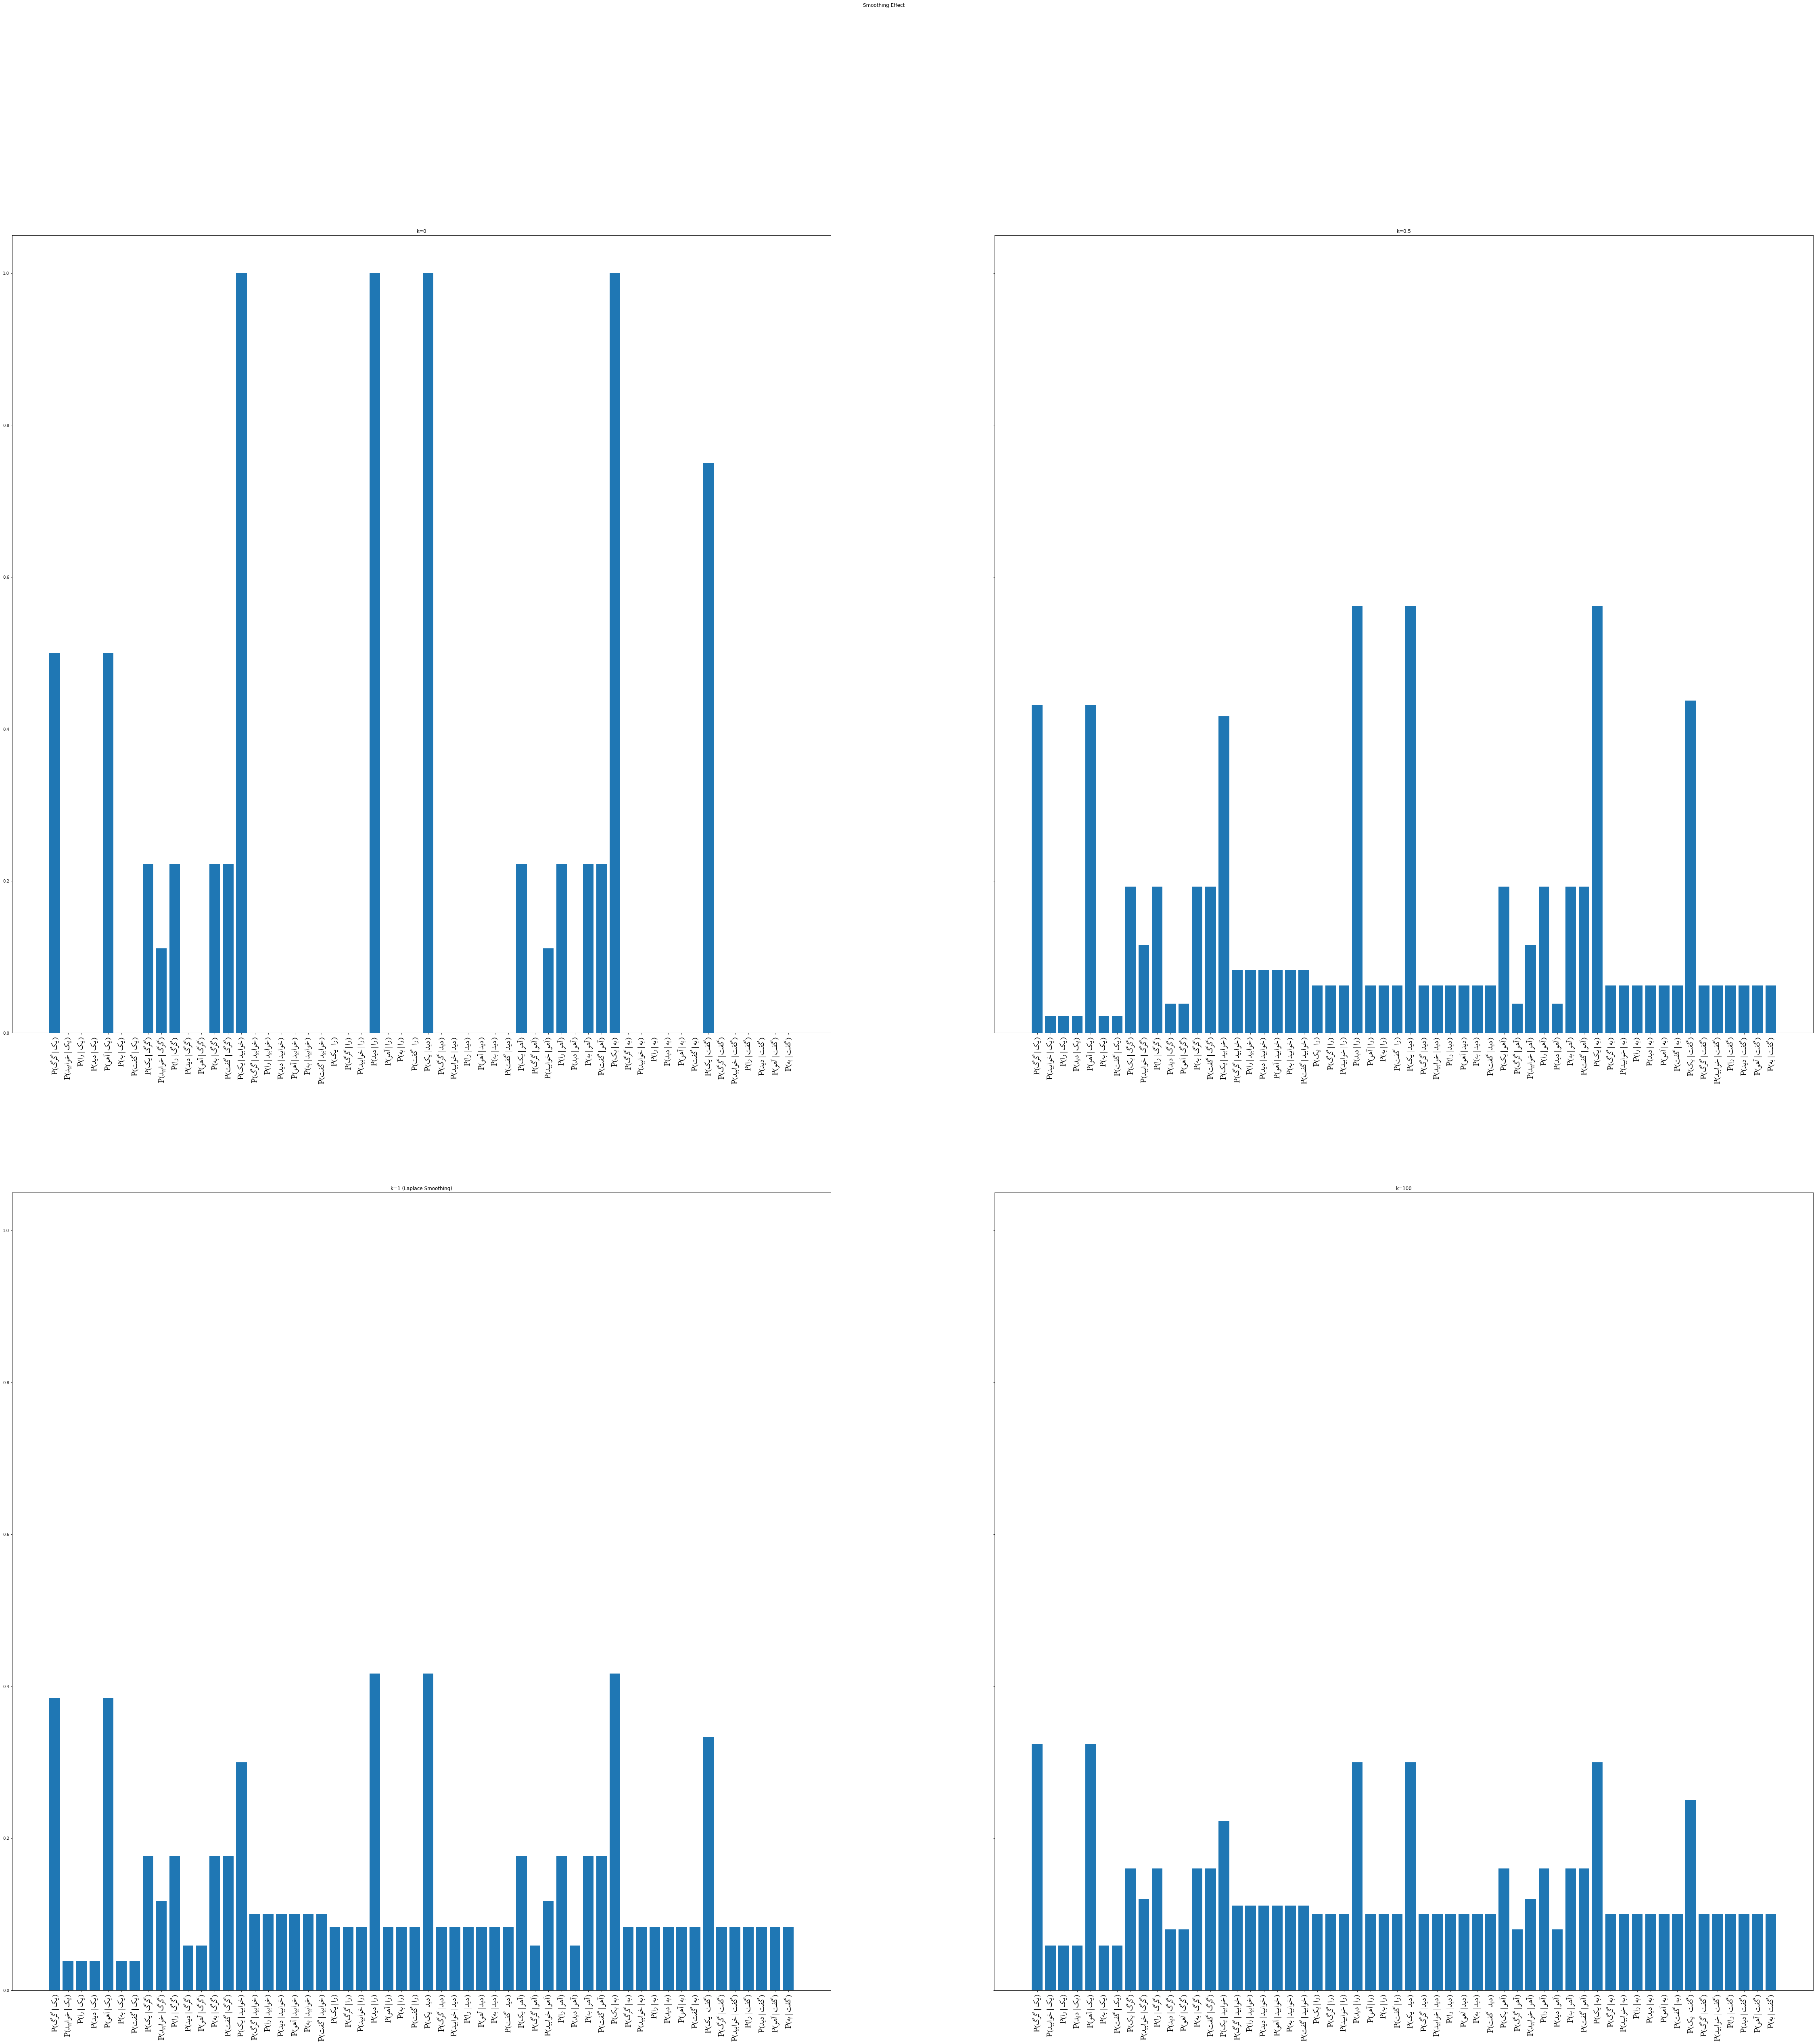

In [294]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2, figsize=(80, 80), sharey=True)

# k=0
axs[0,0].bar(prob_names, p_mle)
axs[0,0].set_title('k=0')
plt.setp(axs[0,0].xaxis.get_majorticklabels(), rotation=90 ,fontproperties=prop)

# k=0.5
axs[0,1].bar(prob_names, p_k05)
axs[0,1].set_title('k=0.5')
plt.setp(axs[0,1].xaxis.get_majorticklabels(), rotation=90 ,fontproperties=prop)

# k=1
axs[1,0].bar(prob_names, p_lap)
axs[1,0].set_title('k=1 (Laplace Smoothing)')
plt.setp(axs[1,0].xaxis.get_majorticklabels(), rotation=90 ,fontproperties=prop)

# k=100
axs[1,1].bar(prob_names, p_k2)
axs[1,1].set_title('k=100')
plt.setp(axs[1,1].xaxis.get_majorticklabels(), rotation=90 ,fontproperties=prop)



fig.suptitle('Smoothing Effect')
plt.savefig('smoothing.pdf')
fig.show()

In [256]:
tokens = [x.split() for x in mesra_tokens]

In [ ]:
from nltk.util import ngrams


mesra_ngrams = ( ngram for sent in tokens for ngram in ngrams(sent, 3, pad_left = True, pad_right = True, right_pad_symbol='EOS', left_pad_symbol="BOS"))
freq_dist = nltk.FreqDist(mesra_ngrams)
kneser_ney = nltk.KneserNeyProbDist(freq_dist)


In [296]:
prob_sum = 0
for i in kneser_ney.samples():
    if i[0] == "او" and i[1] == "می‌رود":
        prob_sum += kneser_ney.prob(i)
        print ("{0}:{1}".format(i, kneser_ney.prob(i)))
print( prob_sum)



('او', 'می\u200cرود', 'دامن'):0.03571428571428571
('او', 'می\u200cرود', 'زلالست'):0.03571428571428571
('او', 'می\u200cرود', 'عین'):0.03571428571428571
('او', 'می\u200cرود', 'از'):0.17857142857142858
('او', 'می\u200cرود', 'با'):0.03571428571428571
('او', 'می\u200cرود', 'سوار'):0.03571428571428571
0.3571428571428571


# Text Representation

## Distributional Semantics

In [94]:
df = pd.read_csv('farsi/poems.csv')
#df_poets = pd.read_excel('farsi/poets.xlsx')
#numbers_to_poet = dict(zip(df_poets['#Hamistiches'].tolist(), df_poets['Poet'].tolist()))
#numbers_to_birth = dict(zip(df_poets['#Hamistiches'].tolist(), df_poets['Birth'].tolist()))
#poets =[numbers_to_poet[x] for x in df.groupby([1]).size()[0:30].tolist()]
#birth_dict =dict(zip(range(1,31), [numbers_to_birth[x] for x in df.groupby([1]).size()[0:30].tolist()]))
#df['birth'] = df[1].apply(lambda x: birth_dict[x] if x in birth_dict else 100000)
#df['poet'] = df[1].apply(lambda x: poets[x-1] if x <= len(poets) else 'unknown')

In [103]:
import nltk
import pandas as pd
from nltk.corpus import brown
import codecs


all_mesra_1 = df[df['birth']<700]['5'].apply(lambda x: x.strip()).tolist()[0:-1]
all_mesra_2 = df[df['birth']>1000]['5'].apply(lambda x: x.strip()).tolist()[0:-1]
all_mesra_3 = df['5'].apply(lambda x: x.strip()).tolist()[0:-1]


collections = []
for i in range(1,4):
    of = codecs.open(F'farsi/all_mesra_{i}.txt', "w", 'utf-8')
    for sent in eval(F"all_mesra_{i}"):
        of.write(sent+'\n')
    of.close()
    
    f=codecs.open(F'farsi/all_mesra_{i}.txt','rU','utf-8')
    raw=f.read()
    tokens = nltk.word_tokenize(raw)
    collections.append(nltk.Text(tokens))

In [104]:
collections[2].concordance("صراحی")

Displaying 25 of 92 matches:
ندان لب و مست پیرهن چاک و غزل خوان و صراحی در دست نرگسش عربده جوی و لبش افسوس ک
چه خوش در کدو ببست یا رب چه غمزه کرد صراحی که خون خم با نعره‌های قلقلش اندر گلو
به بانگ چنگ مخور می که محتسب تیز است صراحی ای و حریفی گرت به چنگ افتد به عقل نو
ستین مرقع پیاله پنهان کن که همچو چشم صراحی زمانه خون‌ریز است به آب دیده بشوییم 
ر این زمانه رفیقی که خالی از خلل است صراحی می ناب و سفینه غزل است جریده رو که گ
 رفت بیا تا قضا کنیم عمری که بی حضور صراحی و جام رفت مستم کن آن چنان که ندانم ز
 کرد بدان سان سوخت چون شمعم که بر من صراحی گریه و بربط فغان کرد صبا گر چاره دار
فکری در درون ما از این بهتر نمی‌گیرد صراحی می‌کشم پنهان و مردم دفتر انگارند عجب
هت بس زیادتی مطلب کار بر خود آسان کن صراحی می لعل و بتی چو ماهت بس فلک به مردم 
ایق چو مردم ایغاغ یکی چو باده پرستان صراحی اندر دست یکی چو ساقی مستان به کف گرف
گدازم آن دم که به یک خنده دهم جان چو صراحی مستان تو خواهم که گزارند نمازم چون ن
وم یعنی از اهل جهان پاکدلی بگزینم جز صراحی و کتابم نبود یار و ندیم تا حریفان دغ
قه دادن نه 

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf = True, norm ='l2', ngram_range=(1,2), analyzer='word')


In [19]:
doc_term_mat = vectorizer.fit_transform([' '.join(doc) for doc in mesra_tokens])
words = vectorizer.get_feature_names()

In [21]:
doc_term_mat.shape

(329707, 17072)

In [17]:
vectorizer.idf_.shape

(911269,)

In [22]:
vectorizer.get_feature_names()

[' ! ',
 ' !؟',
 ' " ',
 ' &#',
 ' ( ',
 ' ) ',
 ' - ',
 ' -ج',
 ' -ر',
 ' -ن',
 ' -\u200c',
 ' . ',
 ' : ',
 ' ; ',
 ' ;ا',
 ' ;ع',
 ' [ ',
 ' { ',
 ' « ',
 ' » ',
 ' ، ',
 ' ؛ ',
 ' ؟ ',
 ' ؟!',
 ' ؟؟',
 ' ء ',
 ' ء\u200c',
 ' آ ',
 ' آئ',
 ' آا',
 ' آب',
 ' آت',
 ' آث',
 ' آج',
 ' آح',
 ' آخ',
 ' آد',
 ' آذ',
 ' آر',
 ' آز',
 ' آس',
 ' آش',
 ' آص',
 ' آع',
 ' آغ',
 ' آف',
 ' آق',
 ' آل',
 ' آم',
 ' آن',
 ' آه',
 ' آو',
 ' آپ',
 ' آچ',
 ' آژ',
 ' آک',
 ' آگ',
 ' آی',
 ' آ\u200c',
 ' آ\u200e',
 ' أد',
 ' إر',
 ' ئا',
 ' ئش',
 ' ئی',
 ' ا ',
 ' ا-',
 ' اؤ',
 ' اا',
 ' اب',
 ' ات',
 ' اث',
 ' اج',
 ' اح',
 ' اخ',
 ' اد',
 ' اذ',
 ' ار',
 ' از',
 ' اس',
 ' اش',
 ' اص',
 ' اض',
 ' اط',
 ' اظ',
 ' اع',
 ' اغ',
 ' اف',
 ' اق',
 ' ال',
 ' ام',
 ' ان',
 ' اه',
 ' او',
 ' اژ',
 ' اک',
 ' اگ',
 ' ای',
 ' ا\u200c',
 ' ب ',
 ' بآ',
 ' بأ',
 ' بؤ',
 ' بئ',
 ' با',
 ' بب',
 ' بت',
 ' بث',
 ' بج',
 ' بح',
 ' بخ',
 ' بد',
 ' بذ',
 ' بر',
 ' بز',
 ' بس',
 ' بش',
 ' بص',
 ' بض',
 ' بط',
 ' بظ',
 ' بع',

In [14]:
doc_term_mat.shape

(329707, 911269)

In [115]:
idx_doost = words.index('دوست')
idx_rafiq = words.index('رفیق')

In [126]:
vec1 = doc_term_mat[:,idx_doost].toarray()
vec2 = doc_term_mat[:,idx_rafiq].toarray()